In [2]:
from hossam import load_data
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import DataFrame
from pandas import pivot_table
import numpy as np
import pandas as pd
import seaborn as sns

# boston 데이터 작업

In [3]:
origin1 = load_data('boston')
origin1

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
origin1['CRIM'].value_counts()

CRIM
0.01501     2
14.33370    2
0.00632     1
0.02731     1
0.02729     1
           ..
0.72580     1
1.25179     1
0.85204     1
1.23247     1
0.18337     1
Name: count, Length: 504, dtype: int64

In [ ]:
for col in origin1.columns:
    print("총 %d갱 ㅢ")

<Axes: xlabel='RAD', ylabel='MEDV'>

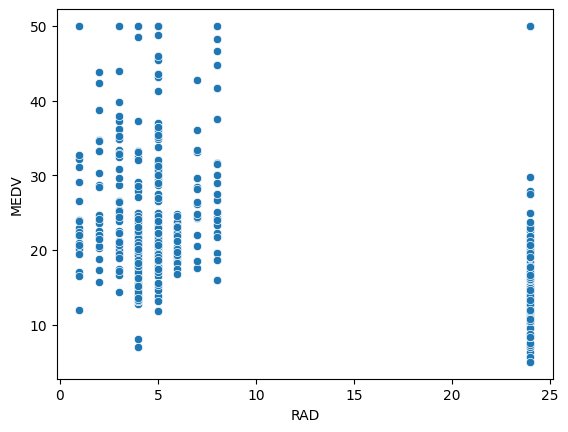

In [11]:
# 이후의 중앙값 예측
#  모형
# 주택 가격 동향 예측
# 고속도로 접근성 지수에 따른 주택 가격 
predict = origin1.sort_values('MEDV', ascending = False)
predict

predict[['MEDV', 'RAD']].head(
)

sns.scatterplot(data=origin1, x='RAD', y = 'MEDV')


In [75]:
# 전처리
df1 = origin1.reset_index()
df1.filter(['MEDV',0]).groupby('MEDV').mean()


""
MEDV
5.0
5.6
6.3
7.0
7.2
...
46.7
48.3
48.5


In [27]:
df2 = pivot_table(origin1,
                  index = 'TAX',
                  columns = 'PTRATIO',
                  values = 'CRIM',
                  aggfunc = 'mean')
df2

PTRATIO,12.6,13.0,13.6,14.4,14.7,14.8,14.9,15.1,15.2,15.3,...,19.2,19.6,19.7,20.1,20.2,20.9,21.0,21.1,21.2,22.0
TAX,,,,,,,,,,,,,,,,,,,,,
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,0.01501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,0.086125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.589432,NaN
469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0136,NaN,NaN


In [19]:
import pandas as pd
origin1['MEDV_BIN'] = pd.cut(origin1['MEDV'], bins=5)

# RAD별 평균 MEDV 분석
df2 = origin1.groupby('RAD')['MEDV'].mean()
df2


RAD
1     24.365000
2     26.833333
3     27.928947
4     21.387273
5     25.706957
6     20.976923
7     27.105882
8     30.358333
24    16.403788
Name: MEDV, dtype: float64

In [21]:
df = origin1.groupby('LSTAT')['MEDV'].mean()
df

LSTAT
1.73     50.0
1.92     50.0
1.98     34.9
2.47     41.7
2.87     36.4
         ... 
34.37    17.9
34.41    14.4
34.77    13.8
36.98     7.0
37.97    13.8
Name: MEDV, Length: 455, dtype: float64

In [16]:
origin1['MEDV'].max()

np.float64(50.0)

In [18]:
origin1['RAD'].max()

np.int64(24)

In [ ]:
RAD = 고속도로 접근성 지수
MEDV = 주택 가격 중앙값

고속도로 접근성 지수가 높을수록 주택 가격 중앙값이 낮다고 판단.

In [79]:
df3 = pd.pivot_table(origin1, index = 'MEDV_BIN', values = 'LSTAT', aggfunc = 'mean')
df3

C:\Users\itwill\AppData\Local\Temp\ipykernel_15652\2191724727.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df3 = pd.pivot_table(origin1, index = 'MEDV_BIN', values = 'LSTAT', aggfunc = 'mean')


,LSTAT
MEDV_BIN,
"(4.955, 14.0]",23.084416
"(14.0, 23.0]",13.773724
"(23.0, 32.0]",8.189837
"(32.0, 41.0]",5.463611
"(41.0, 50.0]",4.160968


In [74]:
df2.head()

RAD
1    24.365000
2    26.833333
3    27.928947
4    21.387273
5    25.706957
Name: MEDV, dtype: float64

In [63]:
origin1['DIS_BIN'] = pd.cut(origin1['DIS'], bins = 3)

df3 = pd.pivot_table(
    origin1,
    index = 'TAX',
    columns = 'DIS_BIN',
    values = 'CRIM',
    aggfunc = 'sum'
)
df3    
# 거리간격이 넓을수록 범죄율이 높아진닫다.

C:\Users\itwill\AppData\Local\Temp\ipykernel_15652\422727086.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df3 = pd.pivot_table(


DIS_BIN,"(1.119, 4.795]","(4.795, 8.461]","(8.461, 12.126]"
TAX,,,
187,0.00000,0.00000,0.01709
188,1.03887,0.00000,0.00000
193,0.58324,0.00000,0.00000
198,0.00000,0.01501,0.00000
216,0.24616,0.09834,0.01951
...,...,...,...
432,1.31780,0.00000,0.00000
437,8.84148,0.00000,0.00000
469,0.00000,0.01360,0.00000


In [64]:
origin1['MDEV_BIN'] = pd.cut(origin1['MEDV'], bins =3)

df = pd.pivot_table(
    origin1,
    index='RAD',
    columns='MDEV_BIN',
    values='MDEV',
    aggfunc = 'sum'
)

KeyError: 'MDEV'

In [50]:
origin2 = load_data('insurance')
origin2

[data] https://data.hossam.kr/data/kaggle/insurance.xlsx
[desc] 개인의 나이·성별·BMI·흡연 여부·거주 지역 등 기본 건강·인구학적 정보를 바탕으로 의료보험 청구 비용(charges)을 예측하도록 구성된, 선형회귀와 머신러닝 실습에 널리 사용되는 대표적인 보험 비용 데이터셋 (출처: https://www.kaggle.com/datasets/mirichoi0218/insurance)

변수명    의미(설명)
--------  ---------------------------------------------------------------
age       가입자의 나이(세).
sex       성별 (male, female).
bmi       체질량 지수(Body Mass Index).
children  부양 자녀 수(보험 내 자녀 수).
smoker    흡연 여부 (yes / no).
region    미국 내 거주 지역 (northeast, northwest, southeast, southwest).
charges   의료보험 청구 비용(달러). 예측해야 하는 타깃 변수.



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
origin3 = load_data('california')
origin3

[data] https://data.hossam.kr/data/kaggle/california.xlsx
[desc] 1990년 미국 인구조사(Census)를 기반으로 캘리포니아 각 지역의 인구·주택·소득 특성과 주택 중위가격을 담아, 회귀 분석과 머신러닝 모델 실습에 널리 사용되는 대표적인 주택 가격 데이터 (출처: https://www.kaggle.com/datasets/camnugent/california-housing-prices)

field               description
------------------  ------------------------------------------------------------------------------
longitude           경도(Longitude). 서경(–값) 기준.
latitude            위도(Latitude). 북위(+) 기준.
housing_median_age  해당 구역(블록 그룹)의 주택 중위 연령(년).
total_rooms         구역 내 모든 주택의 총 방(room) 수 합계.
total_bedrooms      구역 내 모든 주택의 총 침실(bedroom) 수 합계.
population          구역의 전체 인구 수.
households          구역의 전체 “가구 수”(living units).
median_income       구역의 중위 소득(median income), 단위는 약 1 = $10,000 수준.
median_house_value  주택 중위가격(달러). 회귀의 목표변수(타깃).
ocean_proximity     해안과의 거리/접근성 범주: <1H OCEAN, INLAND, NEAR BAY, NEAR OCEAN, ISLAND 등.



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
